## Problem Statement

##### During lab 3.01 I observed a potential correlation between squarefeet and price. This to me is a natural occurrence because property represented as area represents the non-depreciative asset of land ownership. Addtionally, having many conversations with Bede, there became a focus on the relationships between quality/conditon and salesprice.

##### This raises the question: Are descriptors of depreciation (quality/cond) better estimators of sales price than descriptors of value (property size by sqft)? 

#### H0: The true mean difference in RMSE between models who have more Qual/Cond features than those who do not is 0. 

#### H1: The true mean difference in RMSE between models who have more Qual/Cond features than those who do not is NOT 0. 

> $H_0: \mu_\text{trl_RMSE} - \mu_\text{ctrl_RMSE} = 0$ <br>
> $H_A: \mu_\text{trt_RMSE} - \mu_\text{ctrl_RMSE}\ne0$ <br>
### $$P(\text{data}\;|\;H_0 \text{ true})$$
$$\alpha=0.05$$


#### Let's load our cleaned train set to do some exploration and visualization in an effort to find correlations 

In [2]:
# operating system
import os
# package settings
from sklearn import set_config
# Math
import numpy as np
import scipy as sp
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Data Manip & View
import pandas as pd
# Data Viz
import seaborn as sns
import matplotlib.pyplot as plt
# additional
import warnings

In [3]:
df_train = pd.read_csv('../datasets/cleaned_datasets/cleaned_train.csv', index_col=0)

In [4]:
# https://builtin.com/data-science/pandas-show-all-columns
# to make it easier to scroll through head and compare against df.info
pd.set_option('display.max_columns', None)

In [5]:
df_train.head(1)

,id,pid,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice,ms_zoning,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_type_2,heating,heating_qc,central_air,electrical,kitchen_qual,functional,fireplace_qu,garage_type,garage_finish,garage_qual,garage_cond,paved_drive,sale_type
0,109,533352170,60,68.0,13517,6,8,1976,2005,289.0,533.0,0.0,192.0,725.0,725,754,0,1479,0.0,0.0,2,1,3,1,6,0,1976.0,2.0,475.0,0,44,0,0,0,0,0,3,2010,130500,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,Gable,CompShg,HdBoard,Plywood,BrkFace,Gd,TA,CBlock,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,no_fp,Attchd,RFn,TA,TA,Y,WD


In [114]:
df_train.describe()

,id,pid,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice
count,2051.000000,2.051000e+03,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,68.885422,10065.208191,6.112140,5.562165,1971.708922,1984.190151,98.626524,442.264261,47.935641,567.682838,1057.956850,1164.488055,329.329108,5.512921,1499.330083,0.427109,0.063384,1.577279,0.371039,2.843491,1.042906,6.435885,0.590931,1978.779620,1.776694,473.674793,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,21.309886,6742.488909,1.426271,1.104497,30.177889,21.036250,174.324690,461.094540,164.964052,444.851010,449.303265,396.446923,425.671046,51.068870,500.447829,0.522589,0.251590,0.549279,0.501043,0.826618,0.209790,1.560225,0.638516,24.725364,0.764367,215.881933,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,60.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,220.000000,793.000000,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,474.500000,994.500000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,78.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,159.000000,733.500000,0.000000,811.000000,1318.500000,1405.000000,692.500000,0.000000,1728.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


Now that we have loaded our dataset, we should drop the features that arent a part of our hypothesis/experiment. To recall we are looking to compare the performance of models that have more quality and condition features than squarefeet, in an effort to prove that features focused on costs of property ownership carry more weight when predicting prices over features focused on value/squarefeet.

Features to drop: `pid`,`ms_subclass`,`year_built`,`year_remod/add`,`bsmt_full_bath`,`bsmt_half_bath`,`full_bath`,
`half_bath`,`bedroom_abvgr`,`kitchen_abvgr`,`totrms_abvgrd`,`fireplaces`,`garage_yr_blt`,`garage_cars`,
`enclosed_porch`,`3ssn_porch`,`screen_porch`,`misc_val`,`mo_sold`,`yr_sold`,`ms_zoning`,`street`,`lot_shape`,
`land_contour`,`utilities`,`lot_config`,`land_slope`,`neighborhood`,`condition_1`,`condition_2`,`bldg_type`,
`house_style`,`roof_style`,`roof_matl`,`exterior_1st`,`exterior_2nd`,`mas_vnr_type`,`foundation`,
`bsmt_exposure`,`bsmtfin_type_1`,`bsmtfin_type_2`,`heating`,`central_air`,`electrical`,`functional`,
`garage_type`,`garage_finish`,`paved_drive`,`sale_type`

In total we drop 49 features from the dataset to preserve our focus solely on squarefeet and Quality/Condition fields.

If there is time after we have calculated the mean RMSE scores for the two different models we will make, we should try to identify potential columns we dropped to improve the quality of our model overall rather than strictly looking at Sqft v. Qual/Cond.

In [15]:
df_train_viz = df_train.drop(columns = ['pid','ms_subclass','year_built','year_remod/add','bsmt_full_bath',
                                        'bsmt_half_bath','full_bath','half_bath','bedroom_abvgr','kitchen_abvgr',
                                        'totrms_abvgrd','fireplaces','garage_yr_blt','garage_cars','enclosed_porch',
                                        '3ssn_porch','screen_porch','misc_val','mo_sold','yr_sold','ms_zoning',
                                        'street','lot_shape','land_contour','utilities','lot_config','land_slope',
                                        'neighborhood','condition_1','condition_2','bldg_type','house_style',
                                        'roof_style','roof_matl','exterior_1st','exterior_2nd','mas_vnr_type',
                                        'foundation','bsmt_exposure','bsmtfin_type_1','bsmtfin_type_2','heating',
                                        'central_air','electrical','functional','garage_type','garage_finish',
                                        'paved_drive','sale_type'])

In [16]:
df_train_viz.head()

,id,lot_frontage,lot_area,overall_qual,overall_cond,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,garage_area,wood_deck_sf,open_porch_sf,pool_area,saleprice,exter_qual,exter_cond,bsmt_qual,bsmt_cond,heating_qc,kitchen_qual,fireplace_qu,garage_qual,garage_cond
0,109,68.0,13517,6,8,289.0,533.0,0.0,192.0,725.0,725,754,0,1479,475.0,0,44,0,130500,Gd,TA,TA,TA,Ex,Gd,no_fp,TA,TA
1,544,43.0,11492,7,5,132.0,637.0,0.0,276.0,913.0,913,1209,0,2122,559.0,0,74,0,220000,Gd,TA,Gd,TA,Ex,Gd,TA,TA,TA
2,153,68.0,7922,5,7,0.0,731.0,0.0,326.0,1057.0,1057,0,0,1057,246.0,0,52,0,109000,TA,Gd,TA,TA,TA,Gd,no_fp,TA,TA
3,318,73.0,9802,5,5,0.0,0.0,0.0,384.0,384.0,744,700,0,1444,400.0,100,0,0,174000,TA,TA,Gd,TA,Gd,TA,no_fp,TA,TA
4,255,82.0,14235,6,8,0.0,0.0,0.0,676.0,676.0,831,614,0,1445,484.0,0,59,0,138500,TA,TA,Fa,Gd,TA,TA,no_fp,TA,TA


### For EDA, I have the following goals:
#### 1. For squarefeet features, identify the strongest linear relationships and sales price to include in modeling.
#### 2. For Condition/Quality features, identify the strongest linear relationships and sales price to include in modeling.
#### 3. Identify any multicollinearity within the numerical features and within the categorical features.
#### 4. Examine distributions and identify outliers across features.

### 1. Starting with squarefeet we have in total 15 SqFt based features, let's start by creating scatter plots of squarefeet features to salesprice to better understand grouping and linear relationship. Let's also try and group the plots with features that might share collinearity because of what they measure

#### Lot Area

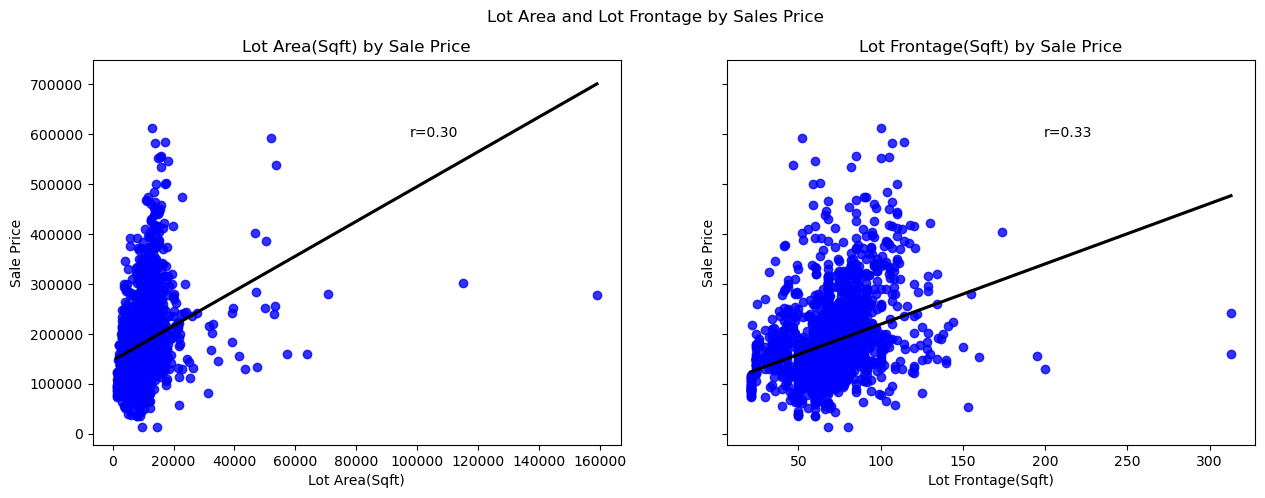

In [116]:
# Massive credit goes to Bede for helping me with these types of visualizations
# and https://stackoverflow.com/questions/25579227/seaborn-lmplot-with-equation-and-r2-text

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Lot Area and Lot Frontage by Sales Price')

# Lot Area
sns.regplot(ax=axes[0],
            x = df_train_viz['lot_area'],
            y = df_train_viz['saleprice'],
            scatter = True,
            ci = 0,
            scatter_kws={"color": "blue"},
            line_kws={"color": "black"}
        )
axes[0].set_title('Lot Area(Sqft) by Sale Price')
axes[0].set_xlabel('Lot Area(Sqft)')
axes[0].set_ylabel('Sale Price')
r, p = sp.stats.pearsonr(x = df_train_viz['lot_area'], y = df_train_viz.saleprice)
axes[0].text(.6, .8, 'r={:.2f}'.format(r),transform=axes[0].transAxes)


# Lot Frontage
sns.regplot(ax=axes[1],
            x = df_train_viz['lot_frontage'],
            y = df_train_viz['saleprice'],
            scatter = True,
            ci = 0,
            scatter_kws={"color": "blue"},
            line_kws={"color": "black"}
        )
axes[1].set_xlabel('Lot Frontage(Sqft)')
axes[1].set_ylabel('Sale Price')
axes[1].set_title('Lot Frontage(Sqft) by Sale Price');
r1, p1 = sp.stats.pearsonr(x = df_train_viz['lot_frontage'], y = df_train_viz.saleprice)
axes[1].text(.6, .8, 'r={:.2f}'.format(r1),transform=axes[1].transAxes);

##### Observations:
- `Lot Area Sqft` , first observation that stands out are the outliers here and in how low the prices are compared to the total Lot Area. Also striking that the Lot Area has a lower PCC score than Lot Frontage. The mean/bulk of the population also seems to be between 0 and 30,000 sqft.<br>
- `Lot Frontage`, similarly the outliers are surprising in both their distance from zero on the x axis, and their lower value on the y axis (sale price). As to which one we include, we'll wait for the covariance score but also probably plot a histogram to better understand their distributions<br>
    - After looking at the distributions, I am tempted to include `Lot frontage` over `Lot Area` for the better centered distribution. 
    - Something else that needs to be done before modeling is removing outliers.


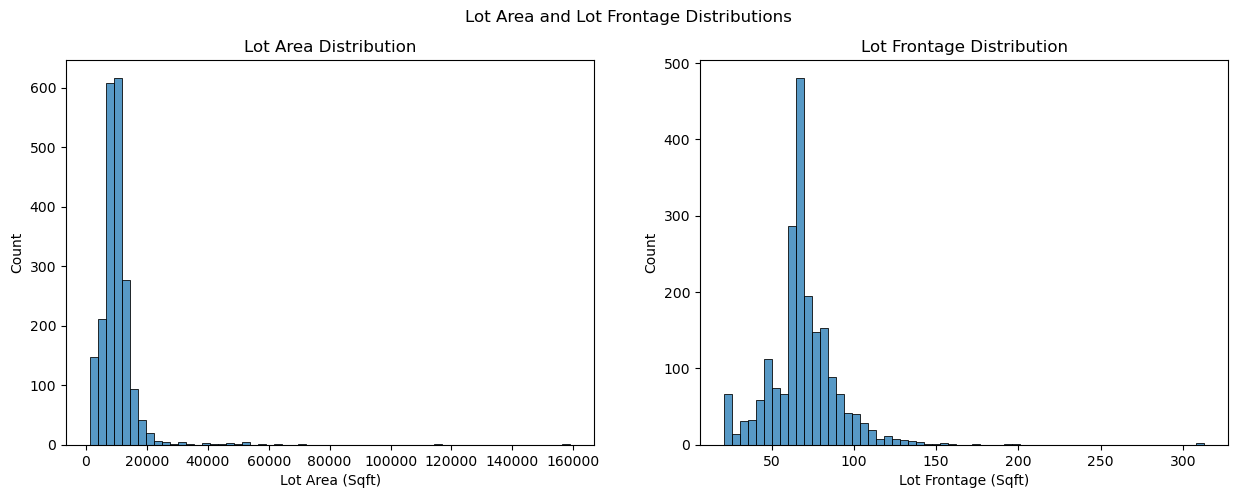

In [126]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Lot Area and Lot Frontage Distributions')

# Lot Area
sns.histplot(ax=axes[0],
             data=df_train_viz,
             x=df_train_viz['lot_area'],
             bins=60)
axes[0].set_title('Lot Area Distribution')
axes[0].set_xlabel('Lot Area (Sqft)')
axes[0].set_ylabel('Count');


# Lot Frontage
sns.histplot(ax=axes[1],
             data=df_train_viz,
             x=df_train_viz['lot_frontage'],
             bins=60)
axes[1].set_title('Lot Frontage Distribution')
axes[1].set_xlabel('Lot Frontage (Sqft)')
axes[1].set_ylabel('Count');

#### Basement Sqft

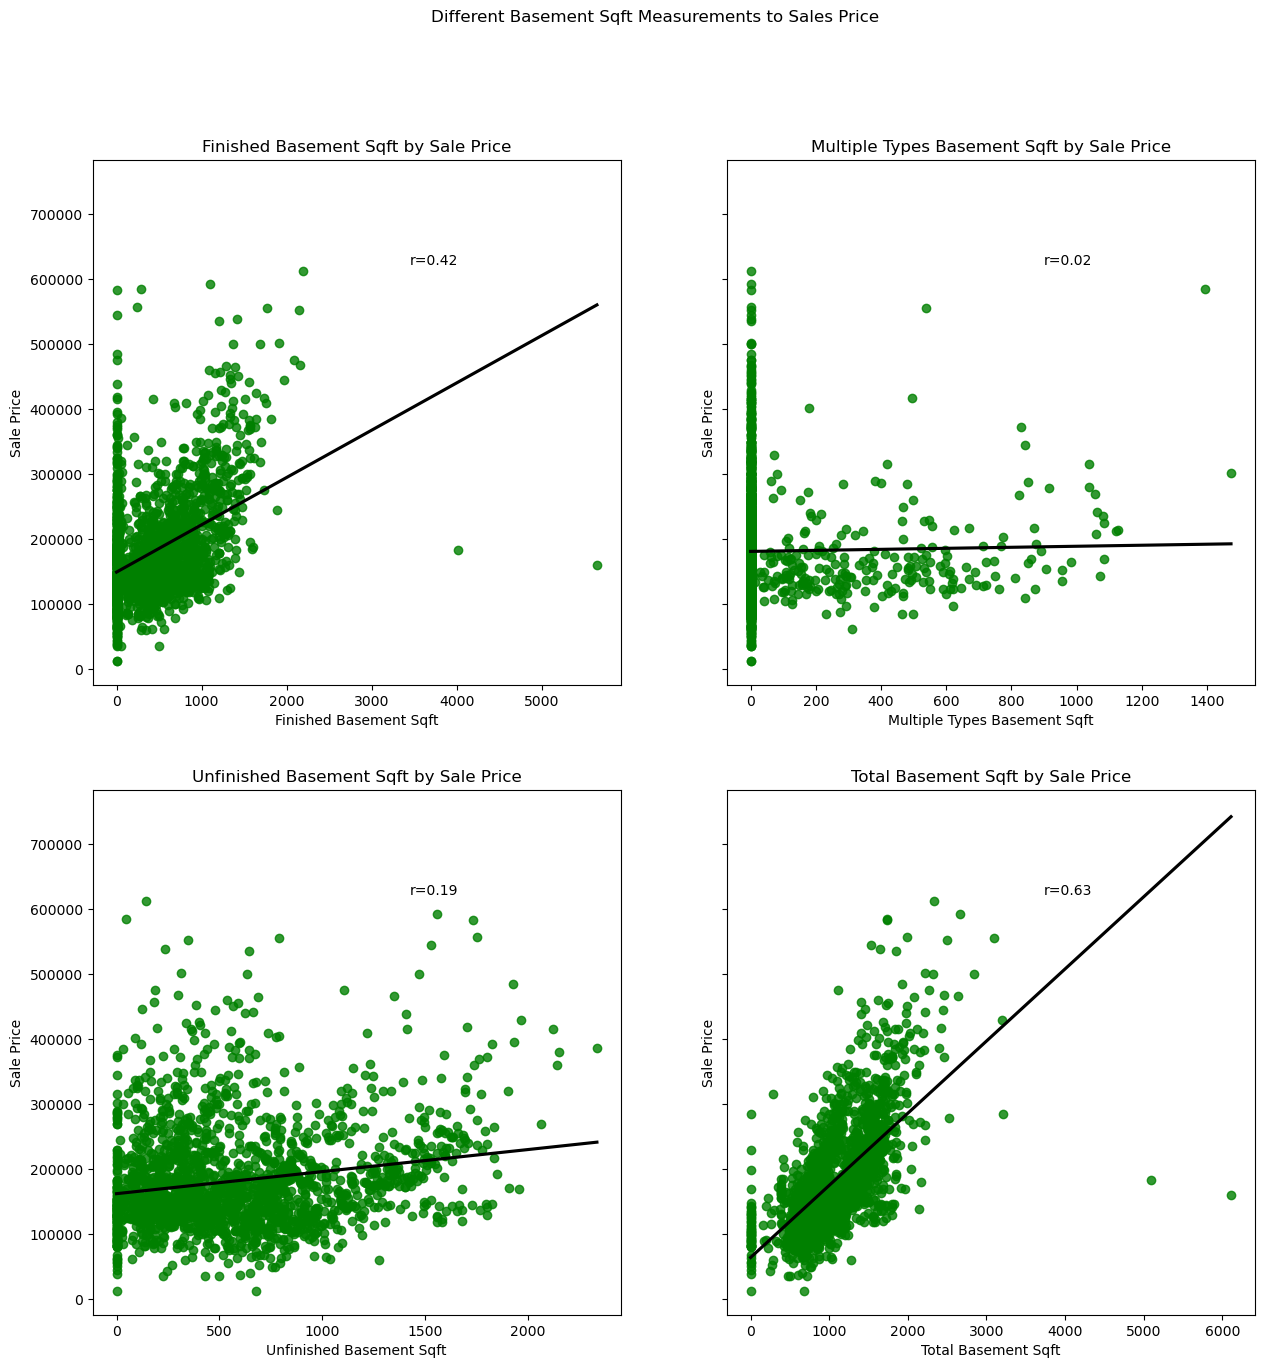

In [96]:
# Massive credit goes to Bede for helping me with these types of visualizations
# and https://stackoverflow.com/questions/25579227/seaborn-lmplot-with-equation-and-r2-text

fig, axes = plt.subplots(2, 2, figsize=(15, 15), sharey=True)
fig.suptitle('Different Basement Sqft Measurements to Sales Price')

# Finished Basement sqft one type
sns.regplot(ax=axes[0,0],
            x = df_train_viz['bsmtfin_sf_1'],
            y = df_train_viz['saleprice'],
            scatter = True,
            ci = 0,
            scatter_kws={"color": "green"},
            line_kws={"color": "black"}
        )
axes[0,0].set_title('Finished Basement Sqft by Sale Price')
axes[0,0].set_xlabel('Finished Basement Sqft')
axes[0,0].set_ylabel('Sale Price')
r, p = sp.stats.pearsonr(x = df_train_viz['bsmtfin_sf_1'], y = df_train_viz.saleprice)
axes[0,0].text(.6, .8, 'r={:.2f}'.format(r),transform=axes[0,0].transAxes)


# Finished basement sqft multi type
sns.regplot(ax=axes[0,1],
            x = df_train_viz['bsmtfin_sf_2'],
            y = df_train_viz['saleprice'],
            scatter = True,
            ci = 0,
            scatter_kws={"color": "green"},
            line_kws={"color": "black"}
        )
axes[0,1].set_xlabel('Multiple Types Basement Sqft')
axes[0,1].set_ylabel('Sale Price')
axes[0,1].set_title('Multiple Types Basement Sqft by Sale Price');
r1, p1 = sp.stats.pearsonr(x = df_train_viz['bsmtfin_sf_2'], y = df_train_viz.saleprice)
axes[0,1].text(.6, .8, 'r={:.2f}'.format(r1),transform=axes[0,1].transAxes);

# Unfinished Basement sqft
sns.regplot(ax=axes[1,0],
            x = df_train_viz['bsmt_unf_sf'],
            y = df_train_viz['saleprice'],
            scatter = True,
            ci = 0,
            scatter_kws={"color": "green"},
            line_kws={"color": "black"}
        )
axes[1,0].set_title('Unfinished Basement Sqft by Sale Price')
axes[1,0].set_xlabel('Unfinished Basement Sqft')
axes[1,0].set_ylabel('Sale Price')
r2, p2 = sp.stats.pearsonr(x = df_train_viz['bsmt_unf_sf'], y = df_train_viz.saleprice)
axes[1,0].text(.6, .8, 'r={:.2f}'.format(r2),transform=axes[1,0].transAxes)


# Total Basement sqft
sns.regplot(ax=axes[1,1],
            x = df_train_viz['total_bsmt_sf'],
            y = df_train_viz['saleprice'],
            scatter = True,
            ci = 0,
            scatter_kws={"color": "green"},
            line_kws={"color": "black"}
        )
axes[1,1].set_xlabel('Total Basement Sqft')
axes[1,1].set_ylabel('Sale Price')
axes[1,1].set_title('Total Basement Sqft by Sale Price');
r3, p3 = sp.stats.pearsonr(x = df_train_viz['total_bsmt_sf'], y = df_train_viz.saleprice)
axes[1,1].text(.6, .8, 'r={:.2f}'.format(r3),transform=axes[1,1].transAxes);

##### Observations:
- `Unfinished Basement Sqft` Has a poor correlation with sale price observations. While my hypothesis bets on quality and condition features to better predict price, when you have a real measurement of a lower quality/condition I think it impacts the Sale Price hard. There's a difference between subjectively labeling something lower quality/unfinished, and another to then measure something considered low quality, it makes it more real.<br>
- `Multiple Types` I had seen prior while looking over describe() had a large peopulation of 0s which makes it seem like when prices are higher it is more coincidental that there are multiple types of Basement quality.<br>
- `Total Basement sqft` has an overall higher/stronger correlation to price than `Finished Basement sqft`, which is interesting (but not too surprising) because while it encompasses potential observations of `Unfinished Basement sqft`, the relation in measurement is to just area itself which as per the hypothesis, is the true measure of value in the property in this case proportioned to the basement. For a number of these I will make my final decision based on the covariance between them after visualization.

#### Square Feet by different floors

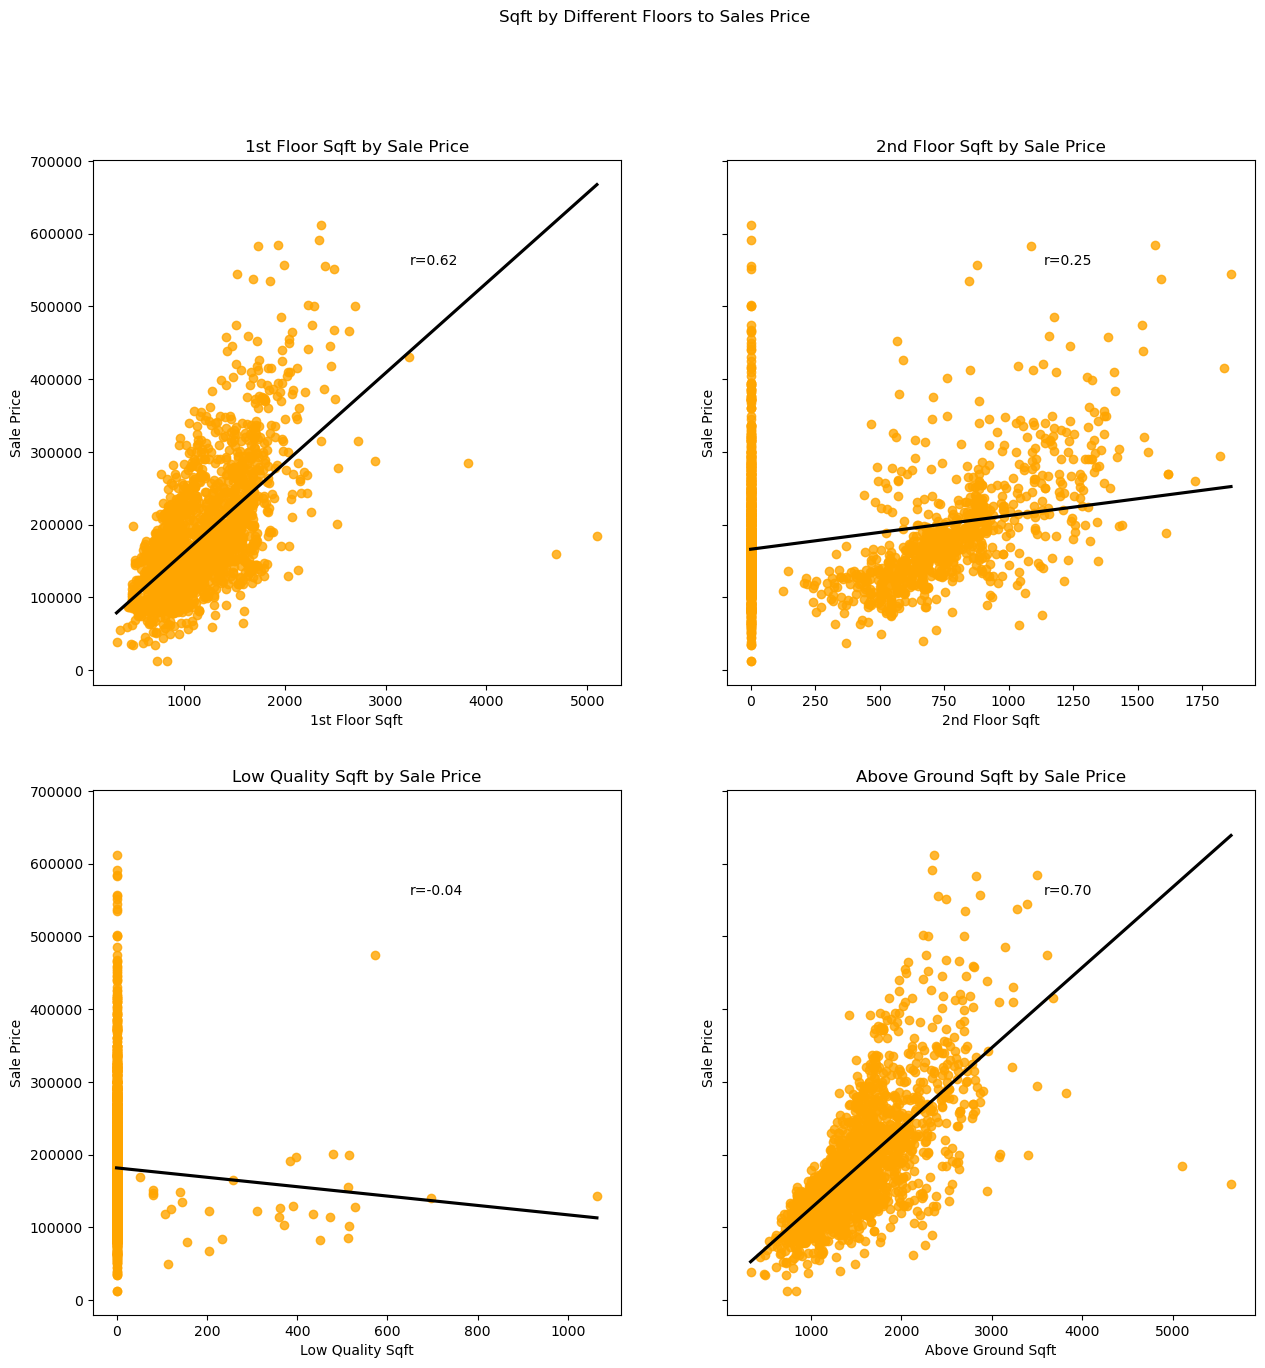

In [105]:
# Massive credit goes to Bede for helping me with these types of visualizations
# and https://stackoverflow.com/questions/25579227/seaborn-lmplot-with-equation-and-r2-text

fig, axes = plt.subplots(2, 2, figsize=(15, 15), sharey=True)
fig.suptitle('Sqft by Different Floors to Sales Price')

# 1st Floor Sqft
sns.regplot(ax=axes[0,0],
            x = df_train_viz['1st_flr_sf'],
            y = df_train_viz['saleprice'],
            scatter = True,
            ci = 0,
            scatter_kws={"color": "orange"},
            line_kws={"color": "black"}
        )
axes[0,0].set_title('1st Floor Sqft by Sale Price')
axes[0,0].set_xlabel('1st Floor Sqft')
axes[0,0].set_ylabel('Sale Price')
r, p = sp.stats.pearsonr(x = df_train_viz['1st_flr_sf'], y = df_train_viz.saleprice)
axes[0,0].text(.6, .8, 'r={:.2f}'.format(r),transform=axes[0,0].transAxes)


# 2nd Floor Sqft
sns.regplot(ax=axes[0,1],
            x = df_train_viz['2nd_flr_sf'],
            y = df_train_viz['saleprice'],
            scatter = True,
            ci = 0,
            scatter_kws={"color": "orange"},
            line_kws={"color": "black"}
        )
axes[0,1].set_xlabel('2nd Floor Sqft')
axes[0,1].set_ylabel('Sale Price')
axes[0,1].set_title('2nd Floor Sqft by Sale Price');
r1, p1 = sp.stats.pearsonr(x = df_train_viz['2nd_flr_sf'], y = df_train_viz.saleprice)
axes[0,1].text(.6, .8, 'r={:.2f}'.format(r1),transform=axes[0,1].transAxes);

# Low quality finished square feet all floors
sns.regplot(ax=axes[1,0],
            x = df_train_viz['low_qual_fin_sf'],
            y = df_train_viz['saleprice'],
            scatter = True,
            ci = 0,
            scatter_kws={"color": "orange"},
            line_kws={"color": "black"}
        )
axes[1,0].set_title('Low Quality Sqft by Sale Price')
axes[1,0].set_xlabel('Low Quality Sqft')
axes[1,0].set_ylabel('Sale Price')
r2, p2 = sp.stats.pearsonr(x = df_train_viz['low_qual_fin_sf'], y = df_train_viz.saleprice)
axes[1,0].text(.6, .8, 'r={:.2f}'.format(r2),transform=axes[1,0].transAxes)


# Above ground living area
sns.regplot(ax=axes[1,1],
            x = df_train_viz['gr_liv_area'],
            y = df_train_viz['saleprice'],
            scatter = True,
            ci = 0,
            scatter_kws={"color": "orange"},
            line_kws={"color": "black"}
        )
axes[1,1].set_xlabel('Above Ground Sqft')
axes[1,1].set_ylabel('Sale Price')
axes[1,1].set_title('Above Ground Sqft by Sale Price');
r3, p3 = sp.stats.pearsonr(x = df_train_viz['gr_liv_area'], y = df_train_viz.saleprice)
axes[1,1].text(.6, .8, 'r={:.2f}'.format(r3),transform=axes[1,1].transAxes);


##### Observations:
- `Low Quality Sqft` Like Unfinished Basement Sqft, I initially assumed in part would be a low correlation. Safe to say not inlcuding in model.<br>
- `1st Floor Sqft` and `Second Floor Sqft` initially surprised me as I had an assumption that having a second floor is preferred, but grounding myself in the costs once again, the taller the house the larger the surface area to maintain especially materials wise. Confirming using value_counts, about half of recorded sales didnt even have 2nd floor space. I will probably choose to remove `Second Floor`space from the model. <br>
- Even further I will probably also look to choose `Above Ground Sqft` over `1st Floor sqft`; `Above Ground Sqft` includes the `1st Floor` and the `2nd Floor`, and while both `ABG` and `1stFlr` have high PCC scores, that probably also means they have High Multicollinearity which could affect my model's bias.

In [115]:
df_train_viz['2nd_flr_sf'].value_counts()

0       1191
728       15
504       14
546       12
600       10
        ... 
1323       1
1288       1
765        1
571        1
776        1
Name: 2nd_flr_sf, Length: 504, dtype: int64

#### OutDoor Sqft

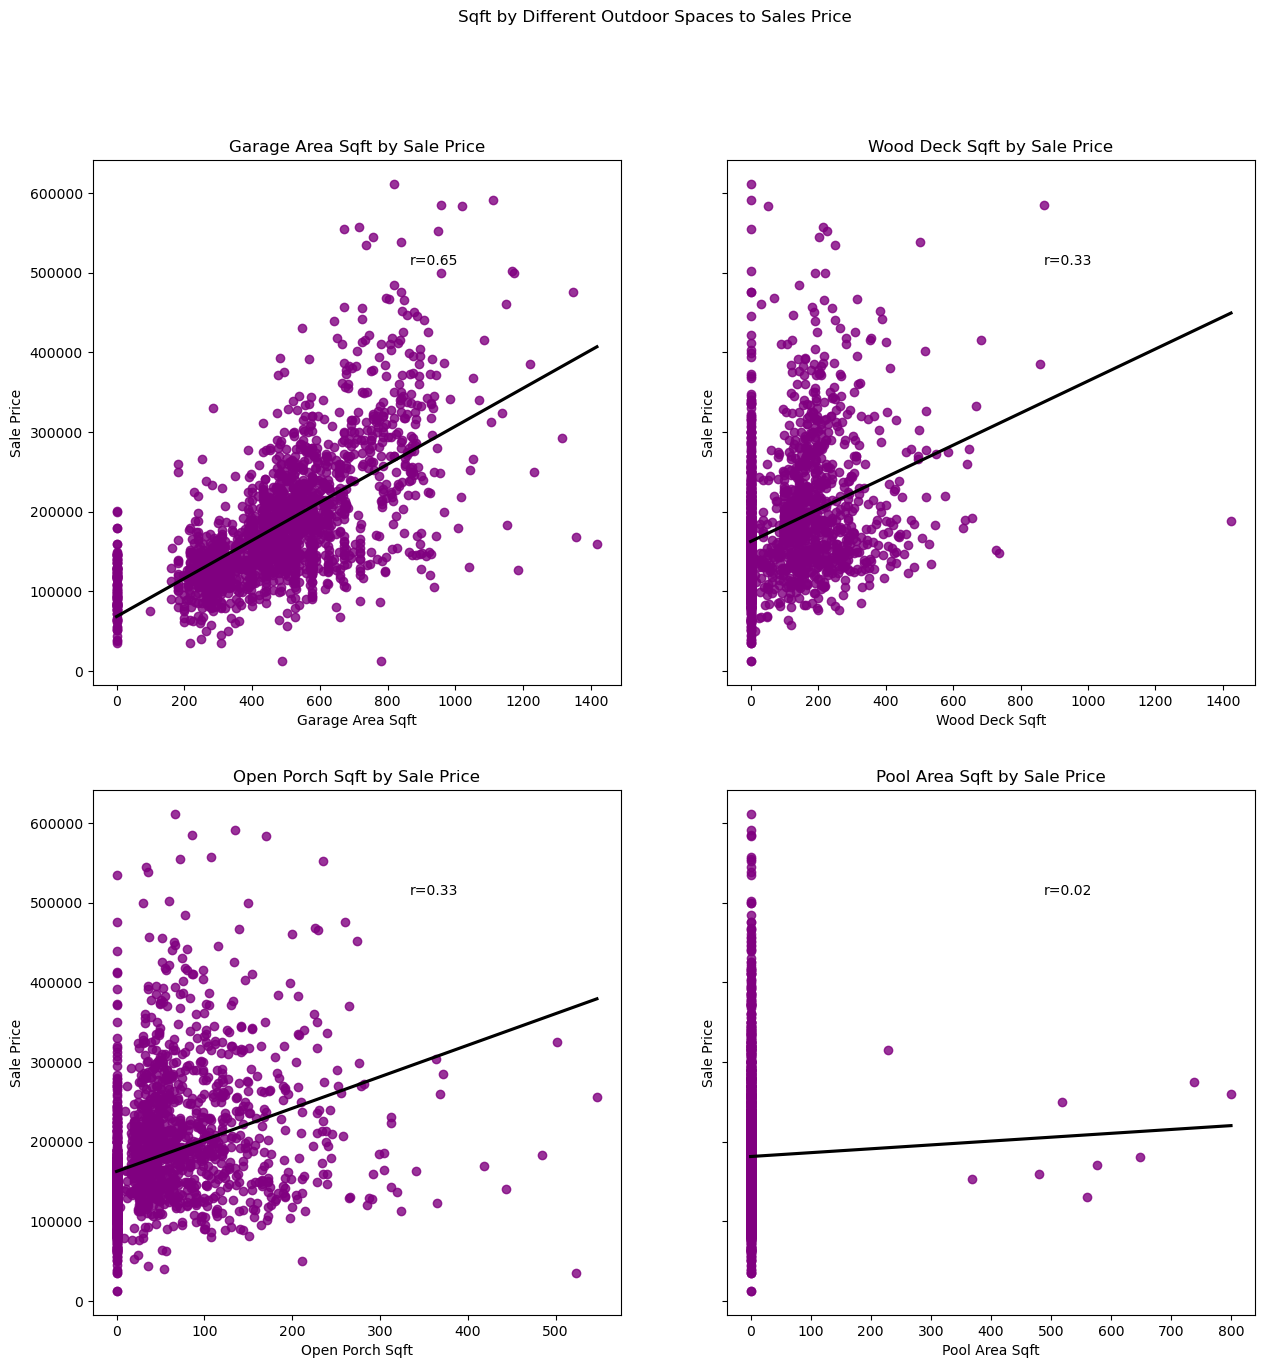

In [107]:
'garage_area', 'wood_deck_sf', 'open_porch_sf','pool_area'
# Massive credit goes to Bede for helping me with these types of visualizations
# and https://stackoverflow.com/questions/25579227/seaborn-lmplot-with-equation-and-r2-text

fig, axes = plt.subplots(2, 2, figsize=(15, 15), sharey=True)
fig.suptitle('Sqft by Different Outdoor Spaces to Sales Price')

# 1st Floor Sqft
sns.regplot(ax=axes[0,0],
            x = df_train_viz['garage_area'],
            y = df_train_viz['saleprice'],
            scatter = True,
            ci = 0,
            scatter_kws={"color": "purple"},
            line_kws={"color": "black"}
        )
axes[0,0].set_title('Garage Area Sqft by Sale Price')
axes[0,0].set_xlabel('Garage Area Sqft')
axes[0,0].set_ylabel('Sale Price')
r, p = sp.stats.pearsonr(x = df_train_viz['garage_area'], y = df_train_viz.saleprice)
axes[0,0].text(.6, .8, 'r={:.2f}'.format(r),transform=axes[0,0].transAxes)


# 2nd Floor Sqft
sns.regplot(ax=axes[0,1],
            x = df_train_viz['wood_deck_sf'],
            y = df_train_viz['saleprice'],
            scatter = True,
            ci = 0,
            scatter_kws={"color": "purple"},
            line_kws={"color": "black"}
        )
axes[0,1].set_xlabel('Wood Deck Sqft')
axes[0,1].set_ylabel('Sale Price')
axes[0,1].set_title('Wood Deck Sqft by Sale Price');
r1, p1 = sp.stats.pearsonr(x = df_train_viz['wood_deck_sf'], y = df_train_viz.saleprice)
axes[0,1].text(.6, .8, 'r={:.2f}'.format(r1),transform=axes[0,1].transAxes);

# Low quality finished square feet all floors
sns.regplot(ax=axes[1,0],
            x = df_train_viz['open_porch_sf'],
            y = df_train_viz['saleprice'],
            scatter = True,
            ci = 0,
            scatter_kws={"color": "purple"},
            line_kws={"color": "black"}
        )
axes[1,0].set_title('Open Porch Sqft by Sale Price')
axes[1,0].set_xlabel('Open Porch Sqft')
axes[1,0].set_ylabel('Sale Price')
r2, p2 = sp.stats.pearsonr(x = df_train_viz['open_porch_sf'], y = df_train_viz.saleprice)
axes[1,0].text(.6, .8, 'r={:.2f}'.format(r2),transform=axes[1,0].transAxes)


# Above ground living area
sns.regplot(ax=axes[1,1],
            x = df_train_viz['pool_area'],
            y = df_train_viz['saleprice'],
            scatter = True,
            ci = 0,
            scatter_kws={"color": "purple"},
            line_kws={"color": "black"}
        )
axes[1,1].set_xlabel('Pool Area Sqft')
axes[1,1].set_ylabel('Sale Price')
axes[1,1].set_title('Pool Area Sqft by Sale Price');
r3, p3 = sp.stats.pearsonr(x = df_train_viz['pool_area'], y = df_train_viz.saleprice)
axes[1,1].text(.6, .8, 'r={:.2f}'.format(r3),transform=axes[1,1].transAxes);

##### Observations:
- `Pool area` isnt all that surprising given our analysis of Pool quality during cleaning, if anything this gives further ground to drop this feature all together based on its population. <br>
- `Open Porch` and `Wood Deck Sqft` share similar distribution shapes as well as the same pearson correlation coefficient of 0.33 which makes sense considering they represent more or less the same feature of a property. Interesting to see their potential multicolinearity.<br>
- `Garage Area Sqft` has an almost strong correlation to sales price with a pcc of 0.65. Definitively positive, not a huge 0 population as well, this is a prime Feature for determining sale price

#### Other

Text(0.6, 0.8, 'r=0.50')

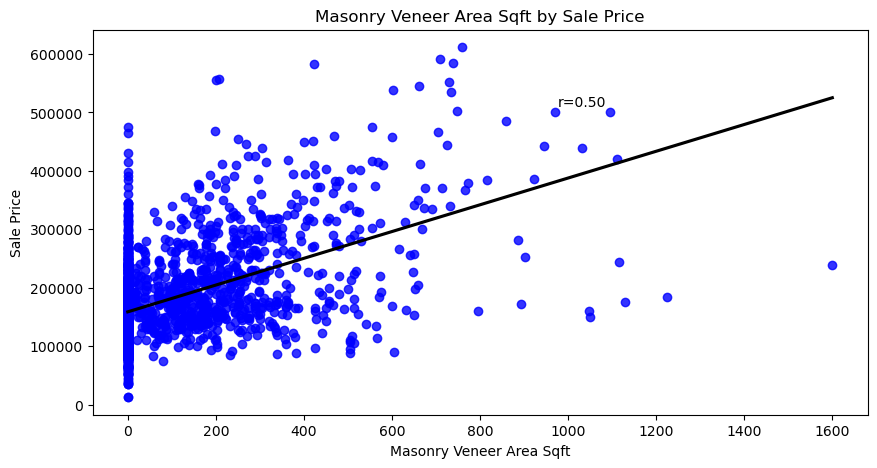

In [113]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5), sharey=True)

# Masonry Veneer Area
sns.regplot(ax=ax,
            x = df_train_viz['mas_vnr_area'],
            y = df_train_viz['saleprice'],
            scatter = True,
            ci = 0,
            scatter_kws={"color": "blue"},
            line_kws={"color": "black"}
        )
ax.set_title('Masonry Veneer Area Sqft by Sale Price')
ax.set_xlabel('Masonry Veneer Area Sqft')
ax.set_ylabel('Sale Price')
r, p = sp.stats.pearsonr(x = df_train_viz['mas_vnr_area'], y = df_train_viz.saleprice)
ax.text(.6, .8, 'r={:.2f}'.format(r),transform=ax.transAxes)



##### Observations:
- There is some/moderate positive correlation between `Masonry Veneer Area` to sale price, with a pearson's r score of 0.5. Interesting though, looking at the number of 0 square feet observations, the range of prices for 0 sqft ranges close to 500,000 dollars, 5/6ths of the sale price range reported for `MVA`. That means to me that `MVA` is not required for sales prices to be higher, but it can definitely increase the sales price of lower priced homes.

### 2. Finally with Qual/Cond we have in total 11 features

#### Overall and External Quality and Condition of Property Sales

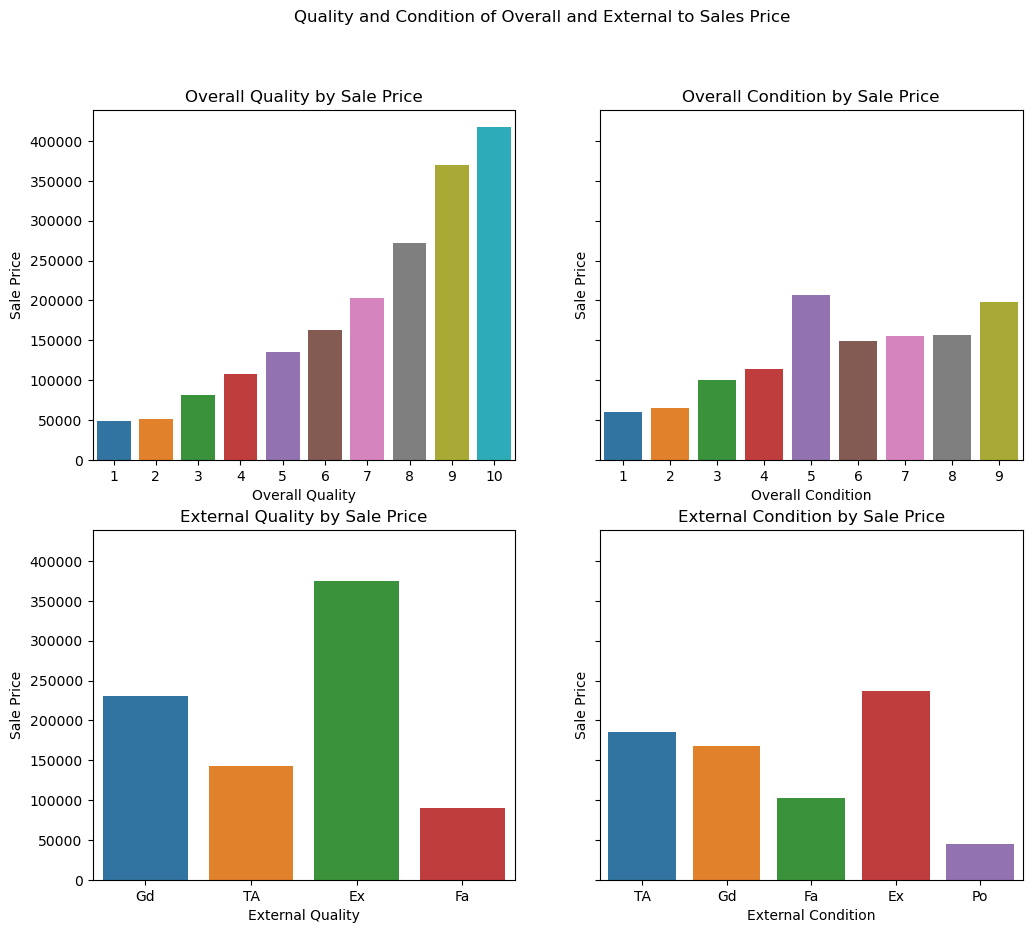

In [135]:
# Massive credit goes to Bede for helping me with these types of visualizations
# and https://stackoverflow.com/questions/25579227/seaborn-lmplot-with-equation-and-r2-text
'overall_qual', 'overall_cond', 'exter_qual', 'exter_cond',

fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharey=True)
fig.suptitle('Quality and Condition of Overall and External to Sales Price')

sns.barplot(ax=axes[0,0],
            data=df_train_viz,
            x="overall_qual",
            y="saleprice",
            ci=False)
axes[0,0].set_title('Overall Quality by Sale Price')
axes[0,0].set_xlabel('Overall Quality')
axes[0,0].set_ylabel('Sale Price')


sns.barplot(ax=axes[0,1],
            data=df_train_viz,
            x="overall_cond",
            y="saleprice",
            ci=False)
axes[0,1].set_xlabel('Overall Condition')
axes[0,1].set_ylabel('Sale Price')
axes[0,1].set_title('Overall Condition by Sale Price');


sns.barplot(ax=axes[1,0],
            data=df_train_viz,
            x="exter_qual",
            y="saleprice",
            ci=False)
axes[1,0].set_title('External Quality by Sale Price')
axes[1,0].set_xlabel('External Quality')
axes[1,0].set_ylabel('Sale Price')


sns.barplot(ax=axes[1,1],
            data=df_train_viz,
            x="exter_cond",
            y="saleprice",
            ci=False)
axes[1,1].set_xlabel('External Condition')
axes[1,1].set_ylabel('Sale Price')
axes[1,1].set_title('External Condition by Sale Price');

##### Observations:
- ##### In 3 of the above barplots, the highest level of quality is associated with the highest sales price.
- ##### Interestingly enough though, in Overall condition, the halfway mark of 5 actually has the highest recorded sales price. 
- ##### In these instances I am leaning towards including Overall Quality, External Quality, and External condition into the model as they follow a predictable ordinal progression of value.

#### Basement and Garage Quality and Condition of Property Sales

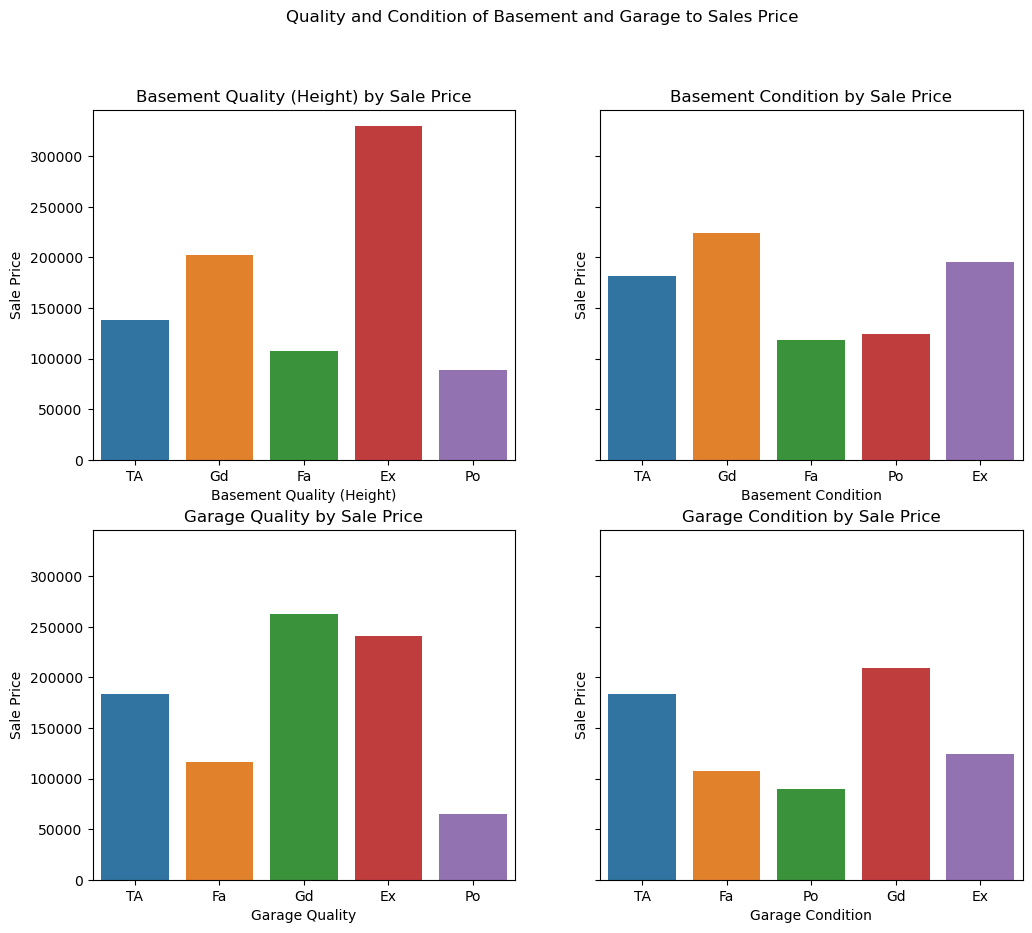

In [138]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharey=True)
fig.suptitle('Quality and Condition of Basement and Garage to Sales Price')

sns.barplot(ax=axes[0,0],
            data=df_train_viz,
            x="bsmt_qual",
            y="saleprice",
            ci=False)
axes[0,0].set_title('Basement Quality (Height) by Sale Price')
axes[0,0].set_xlabel('Basement Quality (Height)')
axes[0,0].set_ylabel('Sale Price')


sns.barplot(ax=axes[0,1],
            data=df_train_viz,
            x="bsmt_cond",
            y="saleprice",
            ci=False)
axes[0,1].set_xlabel('Basement Condition')
axes[0,1].set_ylabel('Sale Price')
axes[0,1].set_title('Basement Condition by Sale Price');


sns.barplot(ax=axes[1,0],
            data=df_train_viz,
            x="garage_qual",
            y="saleprice",
            ci=False)
axes[1,0].set_title('Garage Quality by Sale Price')
axes[1,0].set_xlabel('Garage Quality')
axes[1,0].set_ylabel('Sale Price')


sns.barplot(ax=axes[1,1],
            data=df_train_viz,
            x="garage_cond",
            y="saleprice",
            ci=False)
axes[1,1].set_xlabel('Garage Condition')
axes[1,1].set_ylabel('Sale Price')
axes[1,1].set_title('Garage Condition by Sale Price');


#### Observations:
- ##### This grouping of quality and condition varies greatly from the quality and condition variables in the previous grouping of overall and external. In this grouping only 1 relationship shows the highest grade as the highest price `Basement Quality`.
- ##### While I made the decision on the last grouping based on sensical grouping and ordinal relationships, I am curious to include the variance of these 4 features to the model in how they dont follow the better quality is higher price direction.
- ##### Something else curious is that there is even now a record of the lowest condition (Po: Poor) having a higher sales price than a tier above it in `Basement Condition`.
- ##### To help decide on features for the model let's make a quick histogram comparison as well.
    - ##### Glad we plotted these features distributions to get a better look at these categorical features.
    - ##### All four are positive/right-skewed distributions
    - ##### `Basement Condition`,`Garage Quality`,`Garage Condition` all have massive majorities in their distribution with `Typical/Average` being the most represented condition which doesn't tell us much about our data.
    - ##### `Basement Quality` luckily as at least some population outside of the `Typical/Average` value.
    - ##### Considering the distributions I will look to include Basement Quality in my model

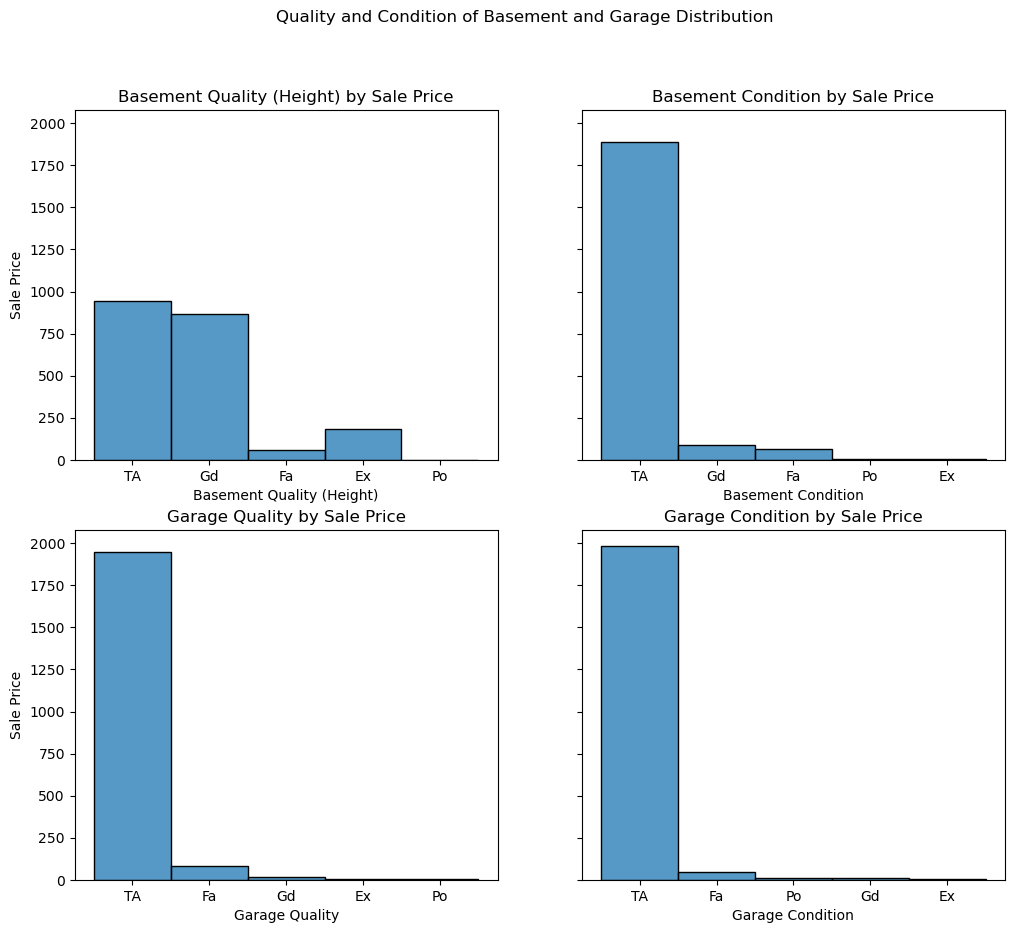

In [145]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharey=True)
fig.suptitle('Quality and Condition of Basement and Garage Distribution')

sns.histplot(ax=axes[0,0],
            data=df_train_viz,
            x="bsmt_qual")
axes[0,0].set_title('Basement Quality (Height) by Sale Price')
axes[0,0].set_xlabel('Basement Quality (Height)')
axes[0,0].set_ylabel('Sale Price')


sns.histplot(ax=axes[0,1],
            data=df_train_viz,
            x="bsmt_cond")
axes[0,1].set_xlabel('Basement Condition')
axes[0,1].set_ylabel('Sale Price')
axes[0,1].set_title('Basement Condition by Sale Price');


sns.histplot(ax=axes[1,0],
            data=df_train_viz,
            x="garage_qual")
axes[1,0].set_title('Garage Quality by Sale Price')
axes[1,0].set_xlabel('Garage Quality')
axes[1,0].set_ylabel('Sale Price')


sns.histplot(ax=axes[1,1],
            data=df_train_viz,
            x="garage_cond")
axes[1,1].set_xlabel('Garage Condition')
axes[1,1].set_ylabel('Sale Price')
axes[1,1].set_title('Garage Condition by Sale Price');

#### Other

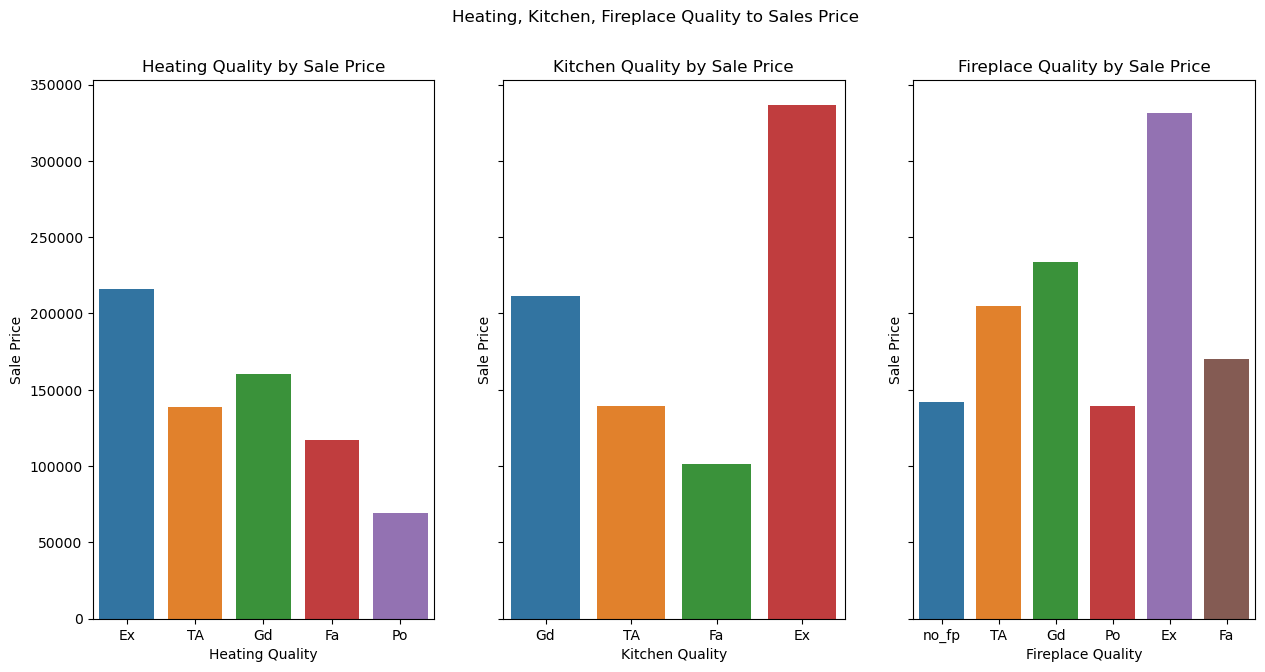

In [144]:
['heating_qc', 'kitchen_qual', 'fireplace_qu']

fig, axes = plt.subplots(1, 3, figsize=(15, 7), sharey=True)
fig.suptitle('Heating, Kitchen, Fireplace Quality to Sales Price')

sns.barplot(ax=axes[0],
            data=df_train_viz,
            x="heating_qc",
            y="saleprice",
            ci=False)
axes[0].set_title('Heating Quality by Sale Price')
axes[0].set_xlabel('Heating Quality')
axes[0].set_ylabel('Sale Price')


sns.barplot(ax=axes[1],
            data=df_train_viz,
            x="kitchen_qual",
            y="saleprice",
            ci=False)
axes[1].set_xlabel('Kitchen Quality')
axes[1].set_ylabel('Sale Price')
axes[1].set_title('Kitchen Quality by Sale Price');


sns.barplot(ax=axes[2],
            data=df_train_viz,
            x="fireplace_qu",
            y="saleprice",
            ci=False)
axes[2].set_title('Fireplace Quality by Sale Price')
axes[2].set_xlabel('Fireplace Quality')
axes[2].set_ylabel('Sale Price');

#### Observations:
- ##### These 3 follow the expected trend of the higher the quality, the higher the Sale price. 
- ##### Distributions wise they are a little more normal than what we were seeing in basement and garage, but not by much.
- ##### All three will make it into the model.

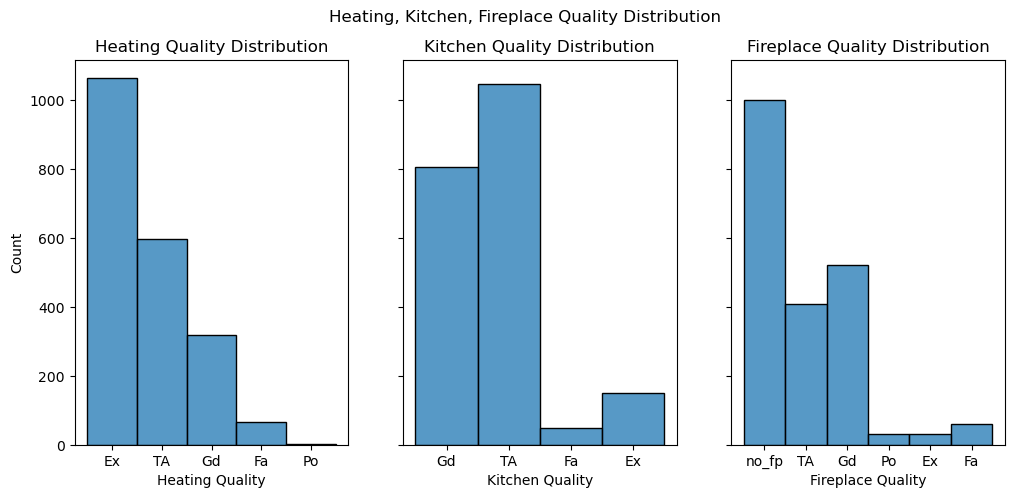

In [150]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5), sharey=True)
fig.suptitle('Heating, Kitchen, Fireplace Quality Distribution')

sns.histplot(ax=axes[0],
            data=df_train_viz,
            x="heating_qc")
axes[0].set_title('Heating Quality Distribution')
axes[0].set_xlabel('Heating Quality')
axes[0].set_ylabel('Count')


sns.histplot(ax=axes[1],
            data=df_train_viz,
            x="kitchen_qual")
axes[1].set_xlabel('Kitchen Quality')
axes[1].set_ylabel('Count')
axes[1].set_title('Kitchen Quality Distribution');


sns.histplot(ax=axes[2],
            data=df_train_viz,
            x="fireplace_qu")
axes[2].set_title('Fireplace Quality Distribution')
axes[2].set_xlabel('Fireplace Quality')
axes[2].set_ylabel('Count');

### Last but not least, let's view a distribution of Saleprice as well just to have a better understanding what what we are predicting

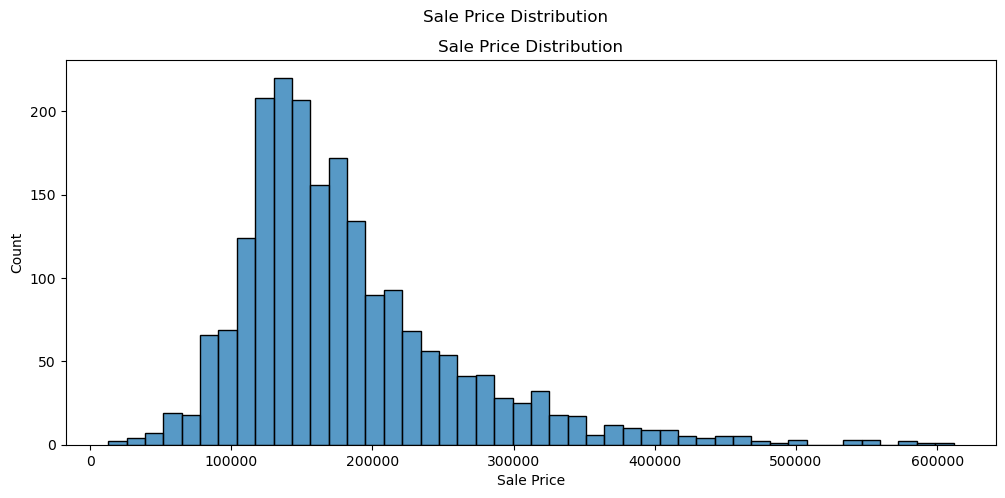

In [153]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))
fig.suptitle('Sale Price Distribution')

sns.histplot(ax=ax,
            data=df_train_viz,
            x="saleprice")
ax.set_title('Sale Price Distribution')
ax.set_xlabel('Sale Price')
ax.set_ylabel('Count');

#### Observations:
- ##### By far the most normal distributed feature thus far, but it is also our prediction.
- ##### There are some very obvious outliers with a few prices way above the 75th percentile of sale price which is ~214,000 

#### Outliers

- #### Now that we've visually confirmed there are outliers in the set, let's find some strategies to deal with the outliers to better our models predictions.
- #### Something we might be able to utilize is the Z-score, which is a measurement that describes a value's relationship to the mean of a group of values.
- #### Quoting investopedia: If a Z-score is 0, it indicates that the data point's score is identical to the mean score, a 1 indicates a value is one standard deviation away from the mean.
- #### Borrowing the assumption that the majority of the data lies between -3 and 3 standard deviations from the mean, can we adjust our train set to lose all observations with a zscore of less than -3 and greater than 3
Cited Source: https://www.investopedia.com/terms/z/zscore.asp

In [161]:
# Attempting to use zscore to reduce outliers in data
zscore_test_set = df_train.select_dtypes('number')

In [162]:
zscore_test_set.shape

(2051, 39)

In [163]:
zscore_test = zscore_test_set[(np.abs(stats.zscore(zscore_test_set)) < 3).all(axis=1)]

In [164]:
zscore_test.shape

(1418, 39)

- #### This is an interesting method of reducing outliers in that it calculates the the zscore of the dataframe given and then creates a new dataframe where the z-score is less than 3 standard deviations from the mean. While this is an effective tool, it also just wiped away 1/4th of my observations in one line of code. I am hoping that regularization and standard scaling the values of the numerical features will help combat the outliers. <br>

- #### Depending on model performance, I may come back and try to alter the above criteria to less than 4 standard deviations from the mean to improve performance, but for now I really want to get us closer to modeling and getting outcomes.

#### Variance Inflation for multicolinearity between numeric columns
    - Included All numerical features to see if we made the right choice focusing on square feet

In [166]:
vi_df = df_train.select_dtypes('number')

In [171]:
# Calculate Variance Inflation for multicolinearity between numeric columns
x = [(vi_df.columns[i], variance_inflation_factor(vi_df.values, i)) for i in range(len(vi_df.columns))]

sorted(x, key = lambda x: x[1], reverse = True)

[('1st_flr_sf', inf),
 ('2nd_flr_sf', inf),
 ('low_qual_fin_sf', inf),
 ('gr_liv_area', inf),
 ('yr_sold', 24985.85470905743),
 ('bsmtfin_sf_1', 19063.109959624715),
 ('total_bsmt_sf', 18084.517271202214),
 ('bsmt_unf_sf', 17739.582098262053),
 ('bsmtfin_sf_2', 2439.8425071357824),
 ('pid', 19.31905973109656),
 ('saleprice', 6.171703401349919),
 ('garage_cars', 6.05685292763435),
 ('garage_area', 6.051678191977015),
 ('year_built', 4.851372251909591),
 ('totrms_abvgrd', 4.558326209721527),
 ('id', 4.370672516275565),
 ('overall_qual', 3.8249409636988747),
 ('garage_yr_blt', 3.189461916179183),
 ('full_bath', 2.7772678664058916),
 ('year_remod/add', 2.646883330341053),
 ('bedroom_abvgr', 2.307566216777752),
 ('half_bath', 2.2157961438015494),
 ('bsmt_full_bath', 2.1944832973203585),
 ('ms_subclass', 1.645342930981106),
 ('fireplaces', 1.5948902051787834),
 ('kitchen_abvgr', 1.5895883618134647),
 ('lot_frontage', 1.5799078719860704),
 ('overall_cond', 1.577332817905852),
 ('mas_vnr_area'

- #### WOW! As predicted, 1st, 2nd, and above ground living area incredibly (but not surprisingly) correlated 
- #### Unfortunately it looks like a lot of the features I picked for this hypothesis are very correlated, although thinking in the same light as 1st,2nd etc. I should have known that square feet correlations would exist outside of categories.
- #### A lot of the features I excluded such as number of baths/rooms are all under 5.0 which is the threshold for VIF
- #### Let's see if these correlations change at all when we calculate on our filtered ddown data set (df_train_viz) select dtypes number. I dont think it will, but worth a look!

In [170]:
vi_viz_df = df_train_viz.select_dtypes('number')
# Calculate Variance Inflation for multicolinearity between numeric columns
x = [(vi_viz_df.columns[i], variance_inflation_factor(vi_viz_df.values, i)) for i in range(len(vi_viz_df.columns))]

sorted(x, key = lambda x: x[1], reverse = True)

[('1st_flr_sf', inf),
 ('2nd_flr_sf', inf),
 ('low_qual_fin_sf', inf),
 ('gr_liv_area', inf),
 ('total_bsmt_sf', 117854.45805156771),
 ('bsmt_unf_sf', 46422.32025948262),
 ('bsmtfin_sf_1', 36429.78979875322),
 ('bsmtfin_sf_2', 2633.136947585266),
 ('overall_qual', 45.688913291600464),
 ('saleprice', 27.5401969965249),
 ('overall_cond', 16.450095157243908),
 ('lot_frontage', 14.686828134188568),
 ('garage_area', 10.910590720640952),
 ('lot_area', 4.365031783376903),
 ('id', 3.8313173738393678),
 ('mas_vnr_area', 1.8381554950047732),
 ('wood_deck_sf', 1.808695145831543),
 ('open_porch_sf', 1.7661835286691658),
 ('pool_area', 1.0699733502605315)]

As predicted, our model is going to have high multicolinearity with the features we have chosen. This won't be the most accurate model, but hopefully it will be able to discern if our hypothesis around Quality/Condition is true or not.

## Closing Notes of EDA

- #### Our hypothesis of Quality/Conditional features being a better predictor of salesprice than square feet may have gotten us into trouble in regards to passing the mulicollinearity test.
- #### The different plots of different square ft measurements were by far the easiest to interpret, but I think it still holds true that SquareFeet is the representation of non-depreciating value in that most of the plots had a positive correlation, where an increase in x (sqft) meant there was a positive increase in y (sale price).
- #### Further the only negative correlations were when squarefeet measurements were combined with categorical labels of lower quality.
- #### Our focus on categorical features also proved insightful as not all plot sale prices followed the assumed quality order of:
    - #### lower quality = lower price
    - #### higher quality = higher price
- #### Also, most of our features are not evenly distributed, especially the quality/condition features which have majorities in the Typical/Average range.
- #### Still curious however to see how a model with more categorical features than numeric performs, and if there is evidence that the hull hypothesis is not true, I wonder if it will actually have anything to do with the actual data, and more to do with the VIF because of only using squarefeet features for numeric.